In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import sparsetools as sp
from matplotlib.colors import LogNorm

In [2]:
obs = sp.profile('test_col200_obs.nc')
fit_alma3 = sp.profile('test_col200_fit_2_alma3.nc')
mod_alma3 = sp.model('test_col200_mod_2_alma3.nc')
fit_alma6 = sp.profile('test_col200_fit_2_alma6.nc')
mod_alma6 = sp.model('test_col200_mod_2_alma6.nc')
fit_both = sp.profile('test_col200_fit_2_rand.nc')
mod_both = sp.model('test_col200_mod_2_rand.nc')
fit_none = sp.profile('test_col200_fit_noalma_2.nc')
mod_none = sp.model('test_col200_mod_noalma_2.nc')

profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights]
model::read: atmos type -> depth-stratified
model::read: nx=1, ny=334, ndep=61, nt=1
model::setSize: nx = 1, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights]
model::read: atmos type -> depth-stratified
model::read: nx=1, ny=334, ndep=61, nt=1
model::setSize: nx = 1, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights]
model::read: atmos type -> depth-stratified
model::read: nx=1, ny=334, ndep=61, nt=1
model::setSize: nx = 1, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights]
model::read: atmos type -> depth-stratified
model::read: nx=1, ny=334, ndep=61, nt=1
model::setSize: nx = 1, ny = 334, ndep 

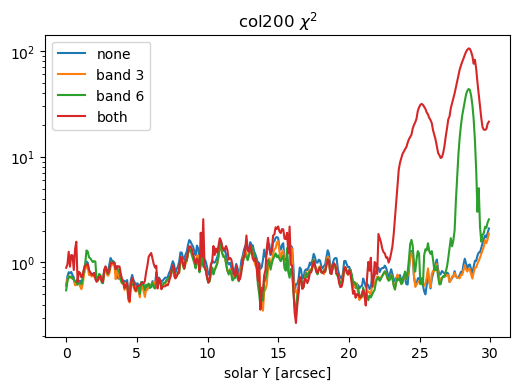

In [30]:
ind = np.where(obs.weights[:,0] < 1)[0]
chi_none = np.sum((fit_none.dat-obs.dat)[0,:,0,:,0]**2/fit_none.weights[:,0],1)
chi_alma3 = np.sum((fit_alma3.dat-obs.dat)[0,:,0,:,0]**2/fit_alma3.weights[:,0],1)
chi_alma6 = np.sum((fit_alma6.dat-obs.dat)[0,:,0,:,0]**2/fit_alma6.weights[:,0],1)
chi_both = np.sum((fit_both.dat-obs.dat)[0,:,0,:,0]**2/fit_both.weights[:,0],1)
plt.plot(np.arange(334)*30/334.,chi_none,label="none")
plt.plot(np.arange(334)*30/334.,chi_alma3,label="band 3")
plt.plot(np.arange(334)*30/334.,chi_alma6,label="band 6")
plt.plot(np.arange(334)*30/334.,chi_both,label="both")
plt.yscale('log')
plt.xlabel('solar Y [arcsec]')
plt.title(r'col200 $\chi^2$')
plt.legend()
plt.savefig('col200_chi2_comparison.png')

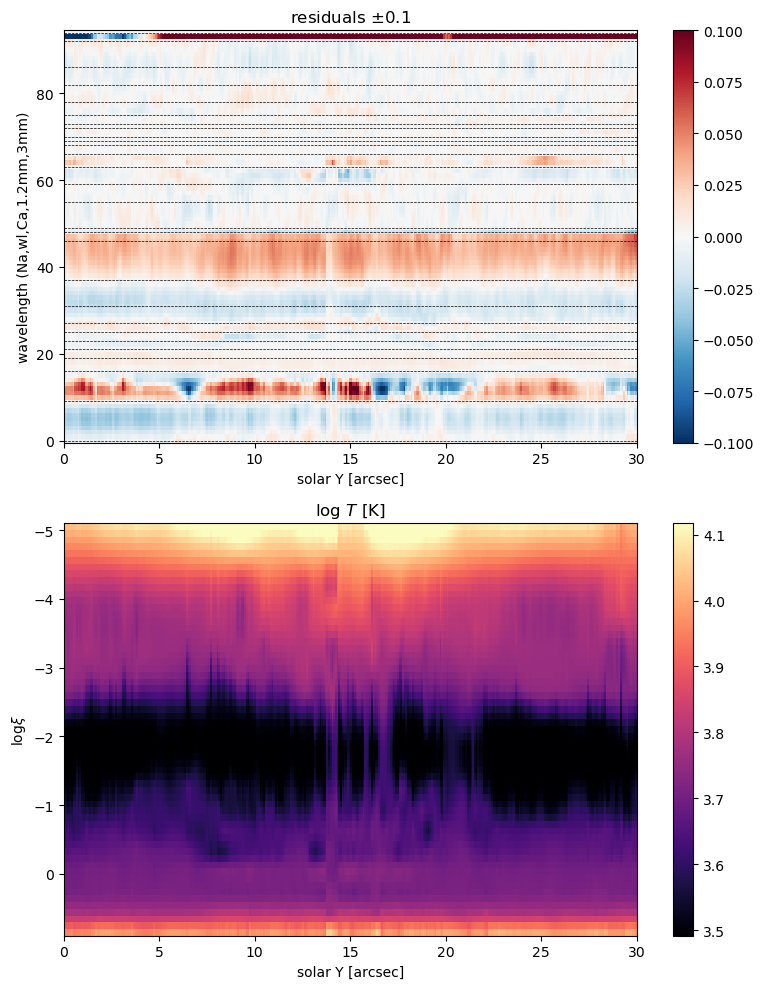

In [15]:
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.imshow((fit.dat-obs.dat)[0,:,0,:,0].T,extent=[0,30,-0.5,obs.nw-0.5],aspect='auto',\
           origin='lower',cmap='RdBu_r',vmin=-0.1,vmax=0.1)
for i in ind:
    plt.axhline(i,linestyle='--',color='k',linewidth=0.5)
plt.title(r'residuals $\pm 0.1$')
plt.colorbar()
plt.ylabel('wavelength (Na,wl,Ca,1.2mm,3mm)')
plt.xlabel('solar Y [arcsec]')
plt.subplot(212)
plt.imshow(np.log10(mod.temp[0,:,0].T),extent=[0,30,0.9,-5.1],aspect='auto',\
           cmap='magma',vmax=np.log10(13100))
plt.colorbar()
plt.ylabel(r'$\log\xi$')
plt.xlabel('solar Y [arcsec]')
plt.title(r'$\log\ T$ [K]')
plt.tight_layout()

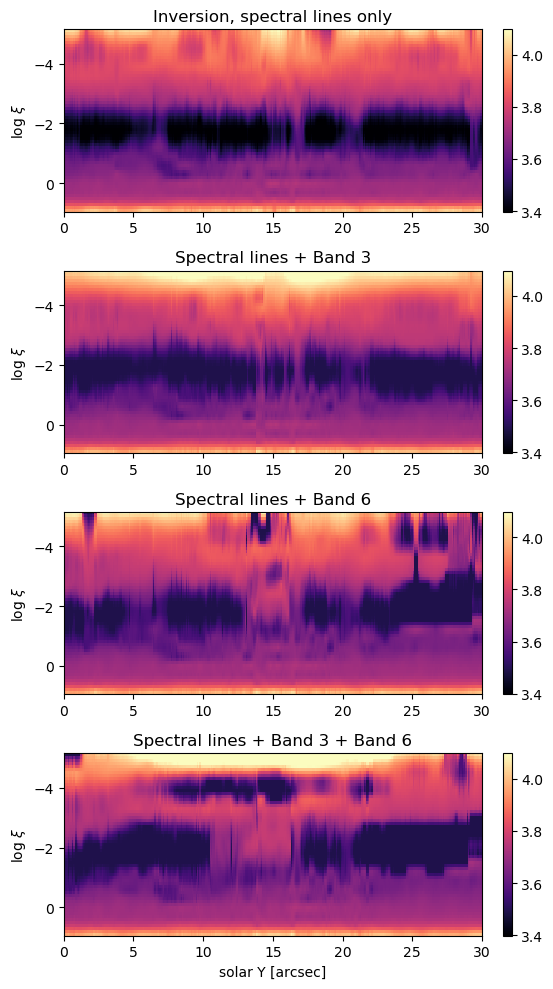

In [31]:
fig,ax = plt.subplots(4,1,figsize=(6,10))
tn = ax[0].imshow(np.log10(mod_none.temp[0,:,0].T),extent=[0,30,0.95,-5.15],\
                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
t3 = ax[1].imshow(np.log10(mod_alma3.temp[0,:,0].T),extent=[0,30,0.95,-5.15],\
                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
t6 = ax[2].imshow(np.log10(mod_alma6.temp[0,:,0].T),extent=[0,30,0.95,-5.15],\
                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
tb = ax[3].imshow(np.log10(mod_both.temp[0,:,0].T),extent=[0,30,0.95,-5.15],\
                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
for i in range(4):
    plt.colorbar(tn,ax=ax[i],pad=0.04)
ax[0].set_ylabel(r'$\log\ \xi$')
ax[1].set_ylabel(r'$\log\ \xi$')
ax[2].set_ylabel(r'$\log\ \xi$')
ax[3].set_ylabel(r'$\log\ \xi$')
ax[3].set_xlabel('solar Y [arcsec]')
ax[0].set_title('Inversion, spectral lines only')
ax[1].set_title('Spectral lines + Band 3')
ax[2].set_title('Spectral lines + Band 6')
ax[3].set_title('Spectral lines + Band 3 + Band 6')
plt.tight_layout()
plt.savefig('col200_models_comparison.png')

Text(0.5, 1.0, 'Problematic pixels')

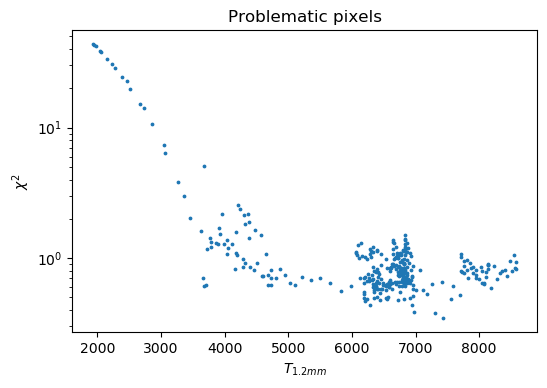

In [5]:
plt.scatter(obs.dat[0,:,0,-2,0]*5900,chi_alma6,s=3)
plt.yscale('log')
plt.xlabel(r'$T_{1.2mm}$')
plt.ylabel(r'$\chi^2$')
plt.title('Problematic pixels')

Text(0.5, 1.0, '$T_b$ vs. $T_{mod}$ correlations')

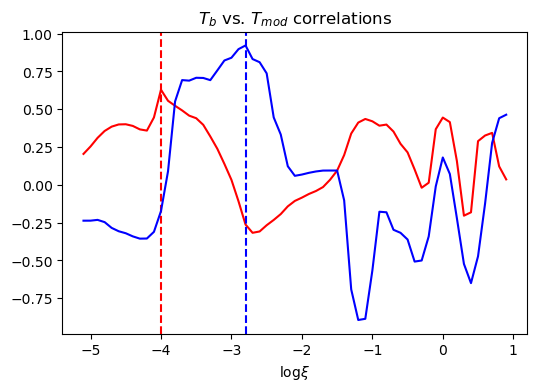

In [18]:
hot = np.where(obs.dat[0,:,0,-2,0]*5900 > 6000)[0]
cool = np.where(obs.dat[0,:,0,-2,0]*5900 < 5500)[0]
corr_hot = np.zeros(61)
corr_cool = np.zeros(61)
for i in range(61):
    corr_hot[i] = np.corrcoef(fit_alma6.dat[0,hot,0,-2,0],mod_alma6.temp[0,hot,0,i])[0,1]
    corr_cool[i] = np.corrcoef(fit_alma6.dat[0,cool,0,-2,0],mod_alma6.temp[0,cool,0,i])[0,1]
plt.plot(np.arange(61)*0.1-5.1,corr_hot,color='red')
plt.axvline(np.argmax(corr_hot)*0.1-5.1,color='red',linestyle='--')
plt.plot(np.arange(61)*0.1-5.1,corr_cool,color='blue')
plt.axvline(np.argmax(corr_cool)*0.1-5.1,color='blue',linestyle='--')
plt.xlabel(r'$\log\xi$')
plt.title(r'$T_b$ vs. $T_{mod}$ correlations')

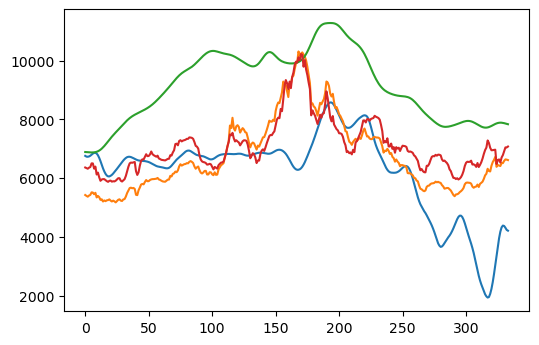

In [13]:
plt.plot(obs.dat[0,:,0,-2,0]*5900)
plt.plot(fit_none.dat[0,:,0,-2,0]*5900)
plt.plot(obs.dat[0,:,0,-1,0]*7300)
plt.plot(fit_none.dat[0,:,0,-1,0]*7300)